In [44]:
class MyLinearRegression:
    def __init__(self, weight=9, bias=3, learning_rate=0.1,
                 iterations=100):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'value':[2,2,2,2,2,2,2,2,2,2,2], 
        'result':[0,2,4,6,8,10,12,14,16,18,20]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,value,result
0,2,0
1,2,2
2,2,4
3,2,6
4,2,8
5,2,10
6,2,12
7,2,14
8,2,16
9,2,18


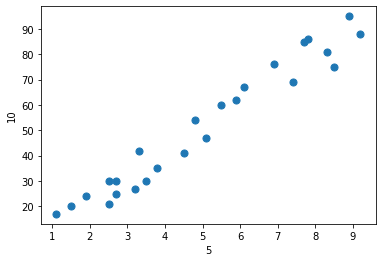

In [46]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=50)
plt.xlabel('5')
plt.ylabel('10')
plt.show()

In [50]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:,:-1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [14.186]	 Bias: [3.77809524]	 Cost: 361.9610800923809
Iteration: 1	 Weight: [-16.39357831]	 Bias: [-1.06695429]	 Cost: 12114.61416017608
Iteration: 2	 Weight: [164.19175791]	 Bias: [27.29661866]	 Cost: 421804.0023659392
Iteration: 3	 Weight: [-901.9790055]	 Bias: [-140.40106317]	 Cost: 14703286.55923191
Iteration: 4	 Weight: [5392.91626551]	 Bias: [849.48939622]	 Cost: 512545669.4348105
Iteration: 5	 Weight: [-31773.21822494]	 Bias: [-4995.21639343]	 Cost: 17866979084.218704
Iteration: 6	 Weight: [187662.20982691]	 Bias: [29512.74362336]	 Cost: 622830255624.9413
Iteration: 7	 Weight: [-1107923.12005822]	 Bias: [-174228.52536644]	 Cost: 21711422272176.793
Iteration: 8	 Weight: [6541440.56844518]	 Bias: [1028695.56437775]	 Cost: 756844827036184.2
Iteration: 9	 Weight: [-38621748.00268466]	 Bias: [-6073580.02399191]	 Cost: 2.638307546281122e+16
Iteration: 10	 Weight: [2.28029661e+08]	 Bias: [35859504.0274464]	 Cost: 9.196953536727096e+17
Iteration: 11	 Weight: [-1.34

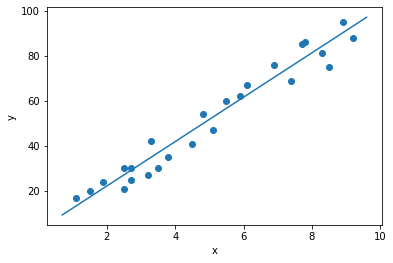

In [ ]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()